In [221]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import functools
import yt
from PIL import Image
#np.set_printoptions(threshold=np.inf)

In [27]:
# catalog name
catalog = 'groups_088.hdf5'

In [28]:
# value of the scale factor (for redshift 0.05)
scale_factor = 0.95238

# open the catalogue
f = h5py.File(catalog, 'r')

In [29]:
# read the positions, velocities and masses of the FoF halos
pos_h  = f['Group/GroupPos'][:]/1e3           #positions in Mpc/h
vel_h  = f['Group/GroupVel'][:]/scale_factor  #velocities in km/s
mass_h = f['Group/GroupMass'][:]*1e10         #masses in Msun/h

# read the positions, black hole masses and stellar masses of the subhalos/galaxies
pos_g  = f['Subhalo/SubhaloPos'][:]/1e3         #positions in Mpc/h
BH_g   = f['Subhalo/SubhaloBHMass'][:]*1e10     #black-hole masses in Msun/h
M_star = f['Subhalo/SubhaloMassType'][:,4]*1e10 #stellar masses in Msun/h

# close file
f.close()

In [30]:
# find the galaxies
galaxy_pos = pos_g[M_star > 0]
print(str(M_star.shape[0]) + ' subhalos and ' + str(galaxy_pos.shape[0]) + ' galaxies.')
numGals = galaxy_pos.shape[0]
L = 25

17267 subhalos and 2446 galaxies.


In [133]:
# graph the galaxies
%matplotlib qt
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_zlim(0, L)
ax.set_xlabel('X [Mpc/h]')
ax.set_ylabel('Y [Mpc/h]')
ax.set_zlabel('Z [Mpc/h]')
ax.scatter(galaxy_pos[:,0], galaxy_pos[:,1], galaxy_pos[:,2], s = 1.5, alpha = 0.7, color = 'red')
plt.tight_layout()
plt.show()

In [120]:
# enumerate wavevectors
gen_ks = np.zeros((1000, 3));
for nx in range(10):
    for ny in range(10):
        for nz in range(10):
            gen_ks[nx*100+ny*10+nz,:] = (2*np.pi/50)*np.array([nx,ny,nz])

ks_oct1 = np.array(list(filter(lambda k: np.linalg.norm(k) < 2*np.pi/5, gen_ks)))
signs = np.array([
    [ 1,  1,  1],
    [ 1,  1, -1],
    [ 1, -1,  1],
    [ 1, -1, -1],
    [-1,  1,  1],
    [-1,  1, -1],
    [-1, -1,  1],
    [-1, -1, -1],])

ks_space = np.unique((signs[:, None, :] * ks_oct1[None, :, :]).reshape(-1, 3), axis=0)

# graph k-grid

%matplotlib qt
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)
ax.set_zlim(-1.4, 1.4)
ax.set_xlabel('X [Mpc/h]')
ax.set_ylabel('Y [Mpc/h]')
ax.set_zlabel('Z [Mpc/h]')
ax.scatter(ks_space[:,0], ks_space[:,1], ks_space[:,2], s = 1.5, alpha = 0.7, color = 'red')
plt.tight_layout()
plt.show()

print("Our grid has " + str(ks_space.shape[0]) + " ks.")

Our grid has 4139 ks.


In [160]:
# map reduce Fourier transform
coeffs = np.mean(np.exp(1j * (galaxy_pos @ ks_space.T)), axis=0)
print("We have " + str(coeffs.shape[0]) + " complex Fourier coefficients!")

def rhoField(r):
    output = np.zeros(r.shape[0], dtype='complex128')
    for i in range(ks_space.shape[0]):
        output += (coeffs[i] * np.exp(-1j * r @ ks_space[i,:].T))
        print(i)
    return output.real

def rhoField_vec(r):
    modes = np.exp(1j * r @ ks_space.T)
    return (modes @ coeffs).real
'''
# visualize the density field
%matplotlib qt
fig = plt.figure(figsize = (8, 8), facecolor='k')
ax = fig.add_subplot(projection='3d', facecolor='k')
ax.tick_params(colors='w')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_zlim(0, L)
ax.set_xlabel('X [Mpc/h]', color='w')
ax.set_ylabel('Y [Mpc/h]', color='w')
ax.set_zlabel('Z [Mpc/h]', color='w')
'''
N = 200
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
z = np.linspace(0, L, N, endpoint=False)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")
points = np.column_stack([
    X.ravel(),
    Y.ravel(),
    Z.ravel()]) # shape (N³, 3)

rho = rhoField(points).reshape(N, N, N)
print(rho)

'''
spaced = np.linspace(0, 25, 400)
for nx in range(400):
    for ny in range(400):
        for nz in range(400):
            gen_pts[nx*160000+ny*400+nz,:] = np.array([spaced[nx],spaced[ny],spaced[nz]])
            rho[nx*160000+ny*400+nz] = rhoField(np.array([spaced[nx],spaced[ny],spaced[nz]])).real
        '''
#ax.scatter(gen_pts[:,0], gen_pts[:,1], gen_pts[:,2], s = 1.5, alpha = 0.7, c = rho, cmap='plasma')
#plt.tight_layout()
#plt.show()
#yt.toggle_interactivity()

We have 4139 complex Fourier coefficients!
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266

'\nspaced = np.linspace(0, 25, 400)\nfor nx in range(400):\n    for ny in range(400):\n        for nz in range(400):\n            gen_pts[nx*160000+ny*400+nz,:] = np.array([spaced[nx],spaced[ny],spaced[nz]])\n            rho[nx*160000+ny*400+nz] = rhoField(np.array([spaced[nx],spaced[ny],spaced[nz]])).real\n        '

yt : [INFO     ] 2026-02-04 22:01:36,789 Parameters: current_time              = 0.0
yt : [INFO     ] 2026-02-04 22:01:36,790 Parameters: domain_dimensions         = [200 200 200]
yt : [INFO     ] 2026-02-04 22:01:36,790 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2026-02-04 22:01:36,790 Parameters: domain_right_edge         = [25. 25. 25.]
yt : [INFO     ] 2026-02-04 22:01:36,790 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2026-02-04 22:01:36,841 xlim = 0.000000 25.000000
yt : [INFO     ] 2026-02-04 22:01:36,842 ylim = 0.000000 25.000000
yt : [INFO     ] 2026-02-04 22:01:36,843 xlim = 0.000000 25.000000
yt : [INFO     ] 2026-02-04 22:01:36,843 ylim = 0.000000 25.000000
yt : [INFO     ] 2026-02-04 22:01:36,844 Making a fixed resolution buffer of (('stream', 'field')) 800 by 800



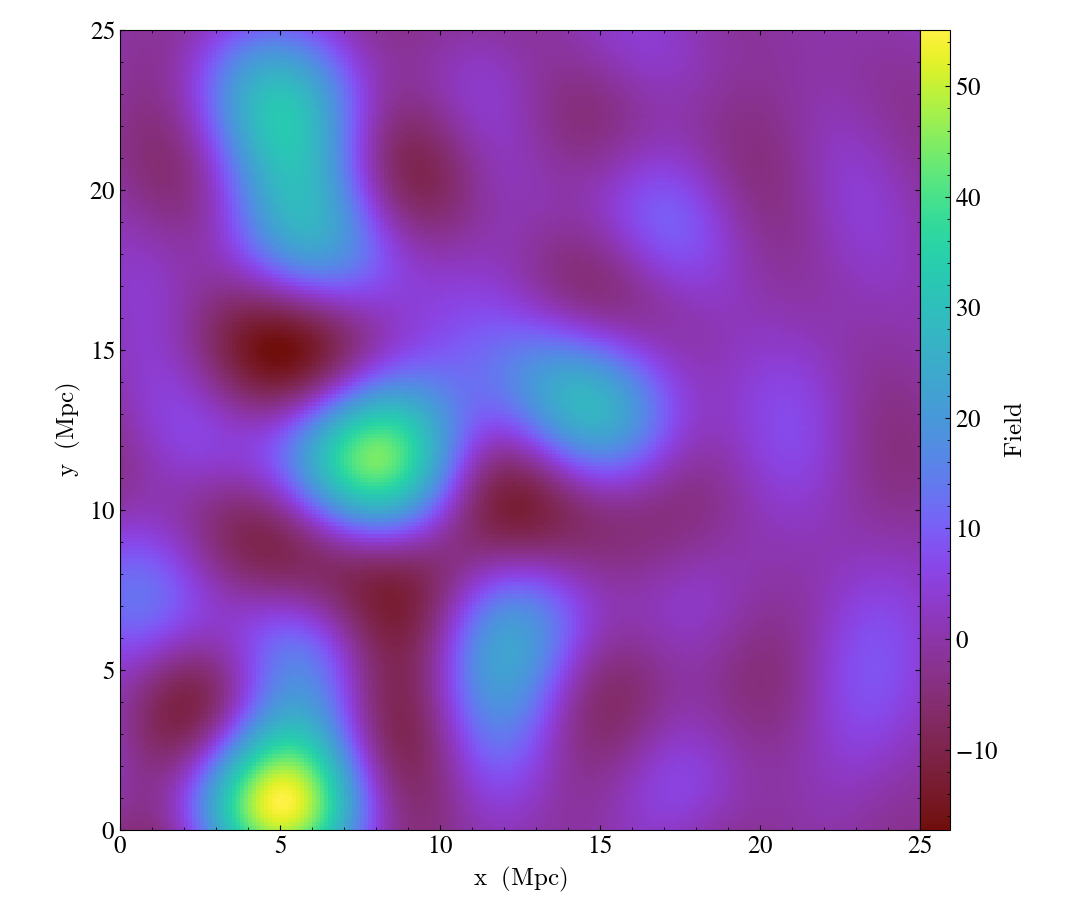

In [219]:
%matplotlib qt
bbox = np.array([[0, L], [0, L], [0, L]])  # domain bounds

ds = yt.load_uniform_grid(
    {"field": rho},
    rho.shape,
    bbox=bbox,
    length_unit="Mpc/h"  # or whatever makes sense
)
slc = yt.SlicePlot(ds, "z", "field", center = [L/2, L/2, 24.5])
slc.set_origin("native")
slc.set_log("field", False)
slc.show()
#slc.save("field_slice.png")


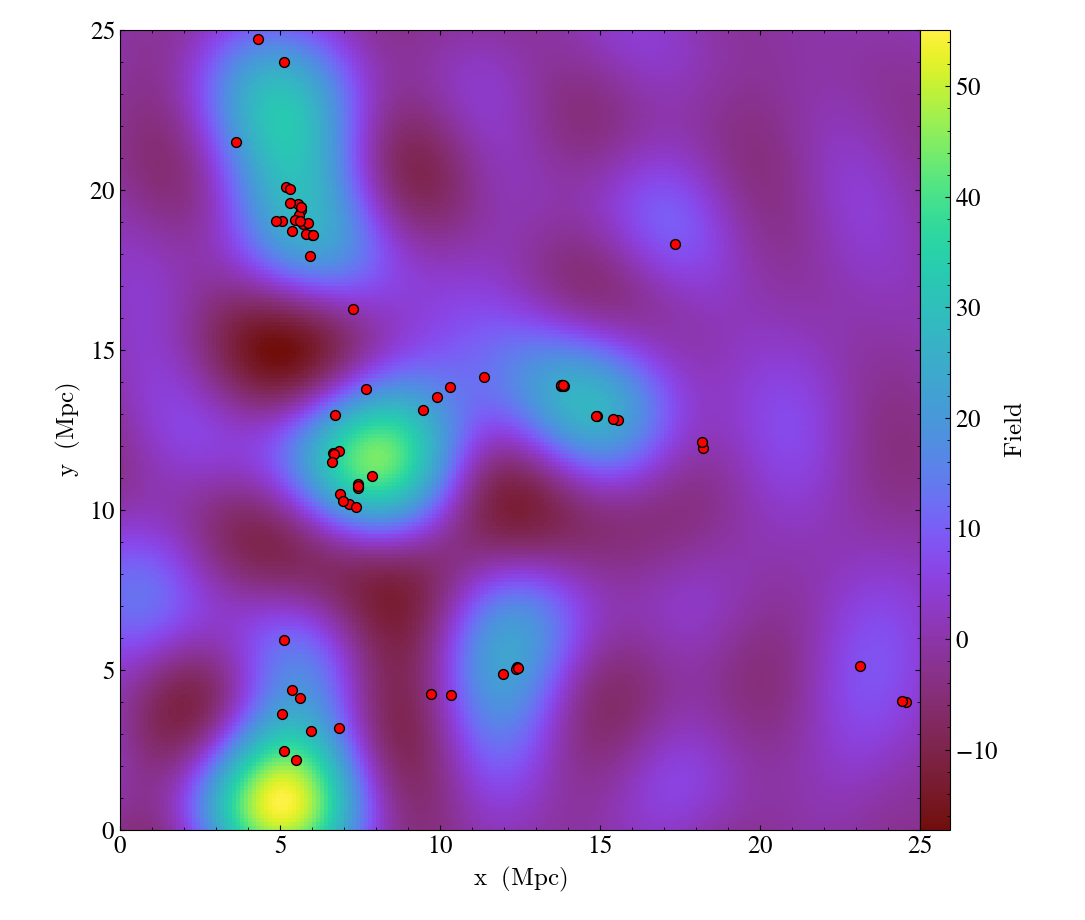

yt : [INFO     ] 2026-02-04 22:01:44,519 Saving plot field_slice24.5.png


['field_slice24.5.png']

In [220]:
slc_gals = np.array(list(filter(lambda r: r[2] > 24 and r[2] < 25, galaxy_pos)))
plot = slc.plots[('field')]
ax = plot.axes
ax.scatter(slc_gals[:, 0], slc_gals[:, 1], 
           c='red', s=50, marker='o', edgecolors='black', linewidths=1)
slc.show()
slc.save("field_slice24.5.png")

In [222]:
imgs = [Image.open(f"field_slice{i+0.5}.png") for i in range(25)]
w, h = imgs[0].size

canvas = Image.new("RGB", (5*w, 5*h))

for i, img in enumerate(imgs):
    x = (i % 5) * w
    y = (i // 5) * h
    canvas.paste(img, (x, y))

canvas.save("cross_sections.png")